In [105]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
import seaborn as sns

In [64]:
df = pd.read_csv("../data/1_flankerText_2021_Jul_14_0545.csv")
df.head(5)

,url,p_black,corrAns,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,instrText_2.started,instrText_2.stopped,warn.started,...,resp_5.started,resp_5.stopped,image_9.started,image_9.stopped,participant,date,expName,psychopyVersion,frameRate,Unnamed: 42
0,C:/Users/nili/Desktop/cog/images/18.png,0.55,b,0,0,0,18,23.495591,None,23.495591,...,42.369939,None,42.369939,None,1,2021_Jul_14_0545,flankerText,2021.2.0,40.015688,NaN
1,C:/Users/nili/Desktop/cog/images/16.png,0.50,b,0,1,1,16,NaN,NaN,NaN,...,62.420694,None,62.420694,None,1,2021_Jul_14_0545,flankerText,2021.2.0,40.015688,NaN
2,C:/Users/nili/Desktop/cog/images/9.png,0.47,w,0,2,2,9,NaN,NaN,NaN,...,76.496604,None,76.496604,None,1,2021_Jul_14_0545,flankerText,2021.2.0,40.015688,NaN
3,C:/Users/nili/Desktop/cog/images/5.png,0.54,w,0,3,3,5,NaN,NaN,NaN,...,87.997385,None,87.997385,None,1,2021_Jul_14_0545,flankerText,2021.2.0,40.015688,NaN
4,C:/Users/nili/Desktop/cog/images/13.png,0.47,w,0,4,4,13,NaN,NaN,NaN,...,101.923886,None,101.923886,None,1,2021_Jul_14_0545,flankerText,2021.2.0,40.015688,NaN


In [73]:
df = df[['url','p_black','corrAns','resp.keys','resp.rt','resp_2.keys','resp_2.rt','resp_3.keys','resp_3.rt','resp_4.keys','resp_4.rt','resp_5.keys','resp_5.rt']]
df.iloc[:,3:] = df.iloc[:,3:].apply(lambda x: x.str.strip('[]\''))
df.head(5)

,url,p_black,corrAns,resp.keys,resp.rt,resp_2.keys,resp_2.rt,resp_3.keys,resp_3.rt,resp_4.keys,resp_4.rt,resp_5.keys,resp_5.rt
0,C:/Users/nili/Desktop/cog/images/18.png,0.55,b,left,1.5381872388534248,b,1.1870942248497158,5,1.180180526804179,w,-0.18671808461658657,9,3.727167297853157
1,C:/Users/nili/Desktop/cog/images/16.png,0.50,b,left,0.4148844894953072,b,0.6373005120549351,5,1.9963848434854299,w,0.434197481488809,space,1.4038932849653065
2,C:/Users/nili/Desktop/cog/images/9.png,0.47,w,left,0.3295878362841904,w,0.42441372387111187,5,1.2308399274479598,b,0.4829874688293785,8,1.4018940443638712
3,C:/Users/nili/Desktop/cog/images/5.png,0.54,w,left,0.8259069963824004,b,0.4610245593357831,5,2.189194043399766,w,0.37801605137065053,9,1.4975276330951601
4,C:/Users/nili/Desktop/cog/images/13.png,0.47,w,right,0.9905030943918973,w,2.046820509713143,6,1.7976076849736273,w,0.7150271458085626,4,1.2450993976090103


In [74]:
df['resp_3.keys'] = df['resp_3.keys'].apply(lambda x: 100 if x=='space' else int(x)*10)
df['resp_5.keys'] = df['resp_5.keys'].apply(lambda x: 100 if x=='space' else int(x)*10)

In [75]:
df

,url,p_black,corrAns,resp.keys,resp.rt,resp_2.keys,resp_2.rt,resp_3.keys,resp_3.rt,resp_4.keys,resp_4.rt,resp_5.keys,resp_5.rt
0,C:/Users/nili/Desktop/cog/images/18.png,0.55,b,left,1.5381872388534248,b,1.1870942248497158,50,1.180180526804179,w,-0.18671808461658657,90,3.727167297853157
1,C:/Users/nili/Desktop/cog/images/16.png,0.50,b,left,0.4148844894953072,b,0.6373005120549351,50,1.9963848434854299,w,0.434197481488809,100,1.4038932849653065
2,C:/Users/nili/Desktop/cog/images/9.png,0.47,w,left,0.3295878362841904,w,0.42441372387111187,50,1.2308399274479598,b,0.4829874688293785,80,1.4018940443638712
3,C:/Users/nili/Desktop/cog/images/5.png,0.54,w,left,0.8259069963824004,b,0.4610245593357831,50,2.189194043399766,w,0.37801605137065053,90,1.4975276330951601
4,C:/Users/nili/Desktop/cog/images/13.png,0.47,w,right,0.9905030943918973,w,2.046820509713143,60,1.7976076849736273,w,0.7150271458085626,40,1.2450993976090103
5,C:/Users/nili/Desktop/cog/images/14.png,0.51,w,left,1.045445775380358,b,0.5374436816200614,40,1.7398837197106332,w,0.49606001819483936,90,1.0969677842222154
6,C:/Users/nili/Desktop/cog/images/3.png,0.52,b,right,0.4413631372153759,w,1.1448648869991302,40,1.2054696881677955,b,0.36918111192062497,60,0.5429631455335766
7,C:/Users/nili/Desktop/cog/images/12.png,0.52,w,right,0.29627143684774637,b,0.4152611431200057,90,1.0023846176918596,w,-0.09693340328522027,40,1.0331060069147497
8,C:/Users/nili/Desktop/cog/images/19.png,0.53,w,right,0.4146274004597217,b,0.3449310837313533,90,0.820829356322065,b,1.2177232468966395,40,0.44611184671521187
9,C:/Users/nili/Desktop/cog/images/17.png,0.39,b,right,2.0672644888982177,w,1.9117173147387803,90,1.5801435799803585,b,0.8348045405000448,30,1.0542242680676281


In [76]:
ignored_conf = df[df['resp.keys']=='right']['resp_3.keys']
ignored_conf = ignored_conf.append(df[df['resp.keys']=='left']['resp_5.keys'])

Chosen_conf = df[df['resp.keys']=='left']['resp_3.keys']
Chosen_conf = Chosen_conf.append(df[df['resp.keys']=='right']['resp_5.keys'])

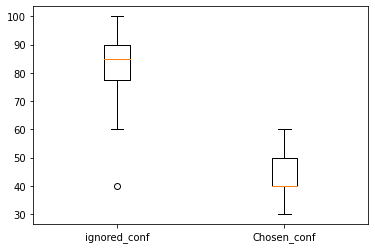

In [93]:
plt.boxplot([ignored_conf,Chosen_conf])
plt.xticks([1,2],['ignored_conf','Chosen_conf'])

plt.show()

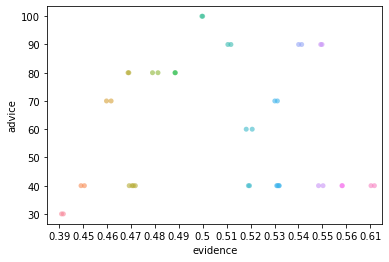

In [119]:
import warnings
warnings.filterwarnings("ignore")

tmp1 =tmp2 = pd.DataFrame()
tmp1[['evidence','advice']]=df[['p_black','resp_3.keys']]
tmp2[['evidence','advice']]=df[['p_black','resp_5.keys']]
tmp1 = tmp1.append(tmp2)

sns.stripplot('evidence', 'advice', data=tmp1, jitter=0.2,alpha=.6);